<a href="https://colab.research.google.com/github/wdzarif/CNN-Image-Recognition/blob/main/cifar10_imagerecognation_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training an image recognition model using CIFAR-10 dataset
Author: Waheed Zarif

Dat: 10/01/2023

Dataset URL: https://www.cs.toronto.edu/~kriz/cifar.html



In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

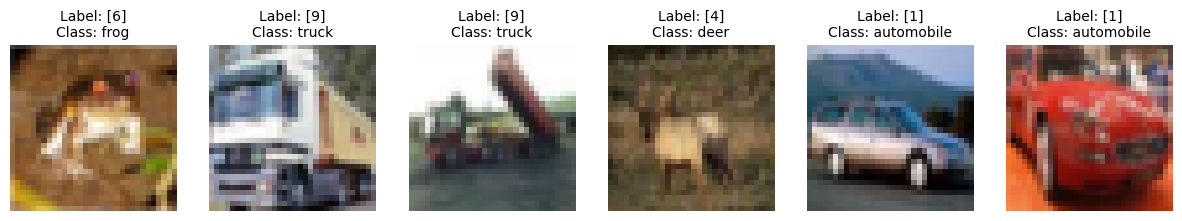

In [ ]:
# visualizing data
import matplotlib.pyplot as plt

c_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
             'frog', 'horse', 'ship', 'truck']

plt.figure (figsize = (15,5))
num_images = 6
for i in range(num_images):
  row = x_train[i]
  label = y_train[i]
  image = row.reshape(32, 32, 3)
  class_name = c_classes[int(label)]  # Get the class name using label as an index
  plt.subplot(1, num_images, i + 1)
  plt.title(f"Label: {label}\nClass: {class_name}", fontdict={'fontsize': 10})
  plt.axis('off')
  plt.imshow(image)
plt.show()

In [ ]:
# Printing the shape of the data
print(f'1. x_train shape: {x_train.shape}\n2. y_train shape: {y_train.shape}\n3. x_test shape: {x_test.shape}\n4. y_test shape: {y_test.shape}')

1. x_train shape: (50000, 32, 32, 3)
2. y_train shape: (50000, 1)
3. x_test shape: (10000, 32, 32, 3)
4. y_test shape: (10000, 1)


In [ ]:
# Reshaping each photo to 3072-dimensional vectors (32*32*3)
x_train = np.reshape(x_train, (50000,3072))
x_test = np.reshape(x_test, (10000,3072))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# Confirming the new shapes
print("Data shapes:\n"
      f"1. x_train shape: {x_train.shape}\n"
      f"2. y_train shape: {y_train.shape}\n"
      f"3. x_test shape: {x_test.shape}\n"
      f"4. y_test shape: {y_test.shape}")

Data shapes:
1. x_train shape: (50000, 3072)
2. y_train shape: (50000, 1)
3. x_test shape: (10000, 3072)
4. y_test shape: (10000, 1)


In [ ]:
# Finding the minimum and maximum value of the vector representing each photo
print(f"Minimum value of x_train: {x_train.min()}, Maximum value of x_train: {x_train.max()}")

Minimum value of x_train: 0.0, Maximum value of x_train: 255.0


In [ ]:
# Normalizing pixel values of images to 0-1 range
x_train = x_train / 255
x_test = x_test / 255
print(f"x_train statistics:\n"
      f"Minimum value: {x_train.min()}\n"
      f"Maximum value: {x_train.max()}")

x_train statistics:
Minimum value: 0.0
Maximum value: 1.0


In [ ]:
# Categorizing the labels
import tensorflow.keras as keras
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# Understanding the shape of x_train dataset
print(f"x_train new shape: {x_train.shape}")

x_train new shape: (50000, 3072)


In [ ]:
# Instantiating the model with Sequential model class
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Setting model with hidden layers
from tensorflow.keras import activations
model = Sequential()
model.add(Dense(units = 512, activation = 'relu', input_shape=(3072,)))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = num_classes, activation='softmax'))

In [ ]:
# Finding model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# traning the model for 20 epochs
history = model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 45s 28ms/step - loss: 1.9202 - accuracy: 0.3111 - val_loss: 1.6746 - val_accuracy: 0.4044
Epoch 2/20
1563/1563 [==============================] - 45s 29ms/step - loss: 1.7071 - accuracy: 0.3891 - val_loss: 1.6839 - val_accuracy: 0.3968
Epoch 3/20
1563/1563 [==============================] - 40s 26ms/step - loss: 1.6386 - accuracy: 0.4172 - val_loss: 1.6078 - val_accuracy: 0.4156
Epoch 4/20
1563/1563 [==============================] - 43s 27ms/step - loss: 1.6001 - accuracy: 0.4306 - val_loss: 1.6013 - val_accuracy: 0.4371
Epoch 5/20
1563/1563 [==============================] - 35s 23ms/step - loss: 1.5766 - accuracy: 0.4390 - val_loss: 1.5649 - val_accuracy: 0.4464
Epoch 6/20
1563/1563 [==============================] - 35s 23ms/step - loss: 1.5614 - accuracy: 0.4486 - val_loss: 1.8131 - val_accuracy: 0.3803
Epoch 7/20
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5471 - accuracy: 0.4564 - val_loss: 1.7279 -

In [ ]:
# Function to plot the training and validation accuracy and loss
def plotLossAndAccuracy(history):
    plt.figure(figsize=(12, 6))

    # Plot Loss
    plt.subplot(1, 2, 1)  # Create a 1x2 grid of subplots, and plot in the first position
    plt.plot(history.history['loss'], label='Training Loss', color='b')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='r')
    plt.xticks(range(0, len(history.history['loss']) + 1, 2))
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.title('Training and Validation Loss', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12, loc='upper right')

    # Plot Accuracy
    plt.subplot(1, 2, 2)  # Plot in the second position
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='g')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='m')
    plt.xticks(range(0, len(history.history['accuracy']) + 1, 2))
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.title('Training and Validation Accuracy', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12, loc='lower right')

    plt.tight_layout()  # Adjust spacing to prevent labels from being cut off
    plt.show()

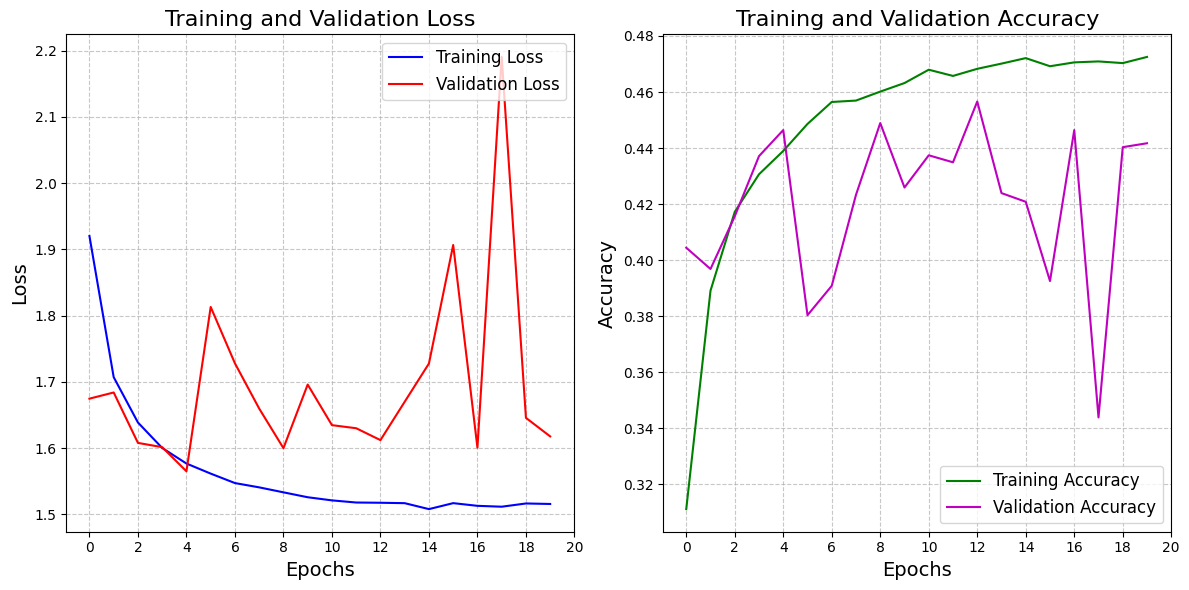

In [ ]:
plotLossAndAccuracy(history)

In [ ]:
# Finding the x_train and x_test shapes
print("x_train shape:", x_train.shape, "x_test shape:", x_test.shape)


x_train shape: (50000, 3072) x_test shape: (10000, 3072)


In [ ]:
# Reshaping the x_train, x_test dataset for convolutional neural net
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)
print("x_train new shape:", x_train.shape, "x_test new shape:", x_test.shape)

x_train new shape: (50000, 32, 32, 3) x_test new shape: (10000, 32, 32, 3)


In [ ]:
# Creating the model for the  Convolutional Neural Net (CNN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3,3), strides=1, padding="same", activation="relu",
                input_shape=(32,32,3)))

model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding="same"))
model.add(Conv2D(50, (3,3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding="same"))
model.add(Conv2D(25, (3,3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [ ]:
# The new model's summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 75)        2100      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 16, 16, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 50)      

In [ ]:
# Compiling the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history_cnn = model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 267s 169ms/step - loss: 1.3370 - accuracy: 0.5325 - val_loss: 1.4002 - val_accuracy: 0.5324
Epoch 2/20
1563/1563 [==============================] - 259s 166ms/step - loss: 0.9942 - accuracy: 0.6562 - val_loss: 1.4502 - val_accuracy: 0.5822
Epoch 3/20
1563/1563 [==============================] - 258s 165ms/step - loss: 0.8677 - accuracy: 0.6990 - val_loss: 1.2701 - val_accuracy: 0.6006
Epoch 4/20
1563/1563 [==============================] - 260s 166ms/step - loss: 0.7869 - accuracy: 0.7288 - val_loss: 0.9475 - val_accuracy: 0.6740
Epoch 5/20
1563/1563 [==============================] - 258s 165ms/step - loss: 0.7225 - accuracy: 0.7506 - val_loss: 0.8353 - val_accuracy: 0.7164
Epoch 6/20
1563/1563 [==============================] - 258s 165ms/step - loss: 0.6650 - accuracy: 0.7705 - val_loss: 0.9179 - val_accuracy: 0.6969
Epoch 7/20
1563/1563 [==============================] - 258s 165ms/step - loss: 0.6188 - accuracy: 0.7866 - val_

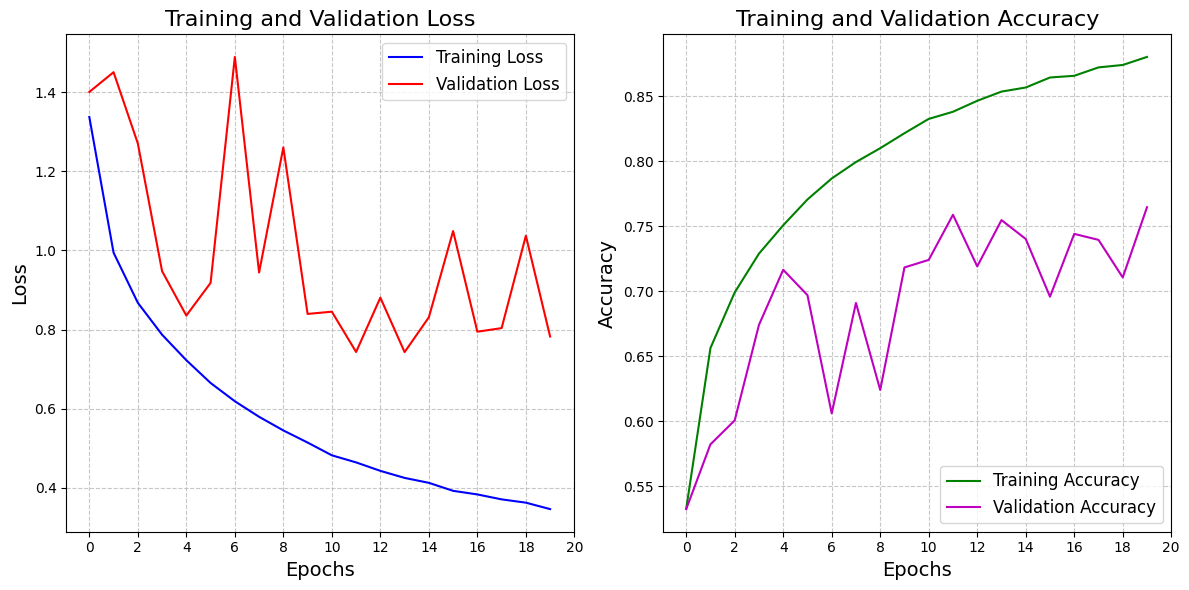

In [ ]:
plotLossAndAccuracy(history_cnn)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create an ImageDataGenerator instance with desired augmentations
datagen = ImageDataGenerator(
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      # shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      # vertical_flip=True,
  )

# Generate augmented images during training
train_generator = datagen.flow(x_train, y_train, batch_size=32)

In [ ]:
# Define early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

In [ ]:
# Fit the model using the augmented data
# Train the model with early stopping
batch_size = 32
history_cnn_img_aug = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // batch_size,
    epochs= 50,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
1562/1562 [==============================] - 295s 188ms/step - loss: 1.1897 - accuracy: 0.5919 - val_loss: 1.4607 - val_accuracy: 0.5465
Epoch 2/50
1562/1562 [==============================] - 291s 186ms/step - loss: 1.0980 - accuracy: 0.6205 - val_loss: 0.9191 - val_accuracy: 0.6964
Epoch 3/50
1562/1562 [==============================] - 302s 194ms/step - loss: 1.0584 - accuracy: 0.6307 - val_loss: 0.9270 - val_accuracy: 0.7013
Epoch 4/50
1562/1562 [==============================] - 289s 185ms/step - loss: 1.0284 - accuracy: 0.6425 - val_loss: 0.7764 - val_accuracy: 0.7368
Epoch 5/50
1562/1562 [==============================] - 290s 185ms/step - loss: 1.0023 - accuracy: 0.6543 - val_loss: 0.7327 - val_accuracy: 0.7512
Epoch 6/50
1562/1562 [==============================] - 291s 186ms/step - loss: 0.9806 - accuracy: 0.6595 - val_loss: 1.1264 - val_accuracy: 0.6487
Epoch 7/50
1562/1562 [==============================] - 286s 183ms/step - loss: 0.9653 - accuracy: 0.6661 - val_

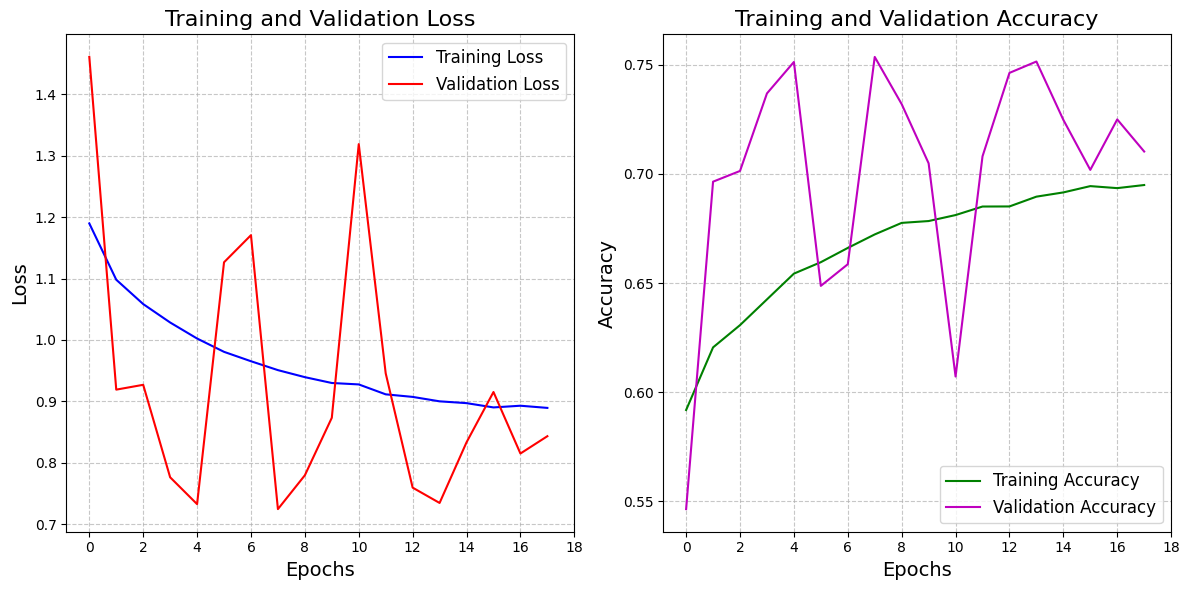

In [ ]:
plotLossAndAccuracy(history_cnn_img_aug)